In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('maxent_ne_chunker')
nltk.download('words')

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package punkt to /home/berna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/berna/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/berna/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/berna/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/berna/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [2]:
df = pd.read_csv('../data/raw_analyst_ratings.csv')

## Exploring the data

In [3]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [5]:
df.shape

(1407328, 6)

In [6]:
df.isnull().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

## Cleaning and shrinking data

In [7]:
df = df.drop(['Unnamed: 0'], axis=1)
# df = df[:100]

## Basic Describtive analysis

In [8]:
#headline length
df['headline_len'] = df['headline'].apply(lambda x: len(x))
df.head()

,headline,url,publisher,date,stock,headline_len
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87


In [9]:
#publisher name length
df['publisher_nleng'] = df['publisher'].apply(lambda x: len(x))
df.head()

,headline,url,publisher,date,stock,headline_len,publisher_nleng
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,17
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,17
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,10
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,10
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,10


In [10]:
ten_top_publisher = df['publisher'].value_counts().sort_values(ascending=False).head(10)

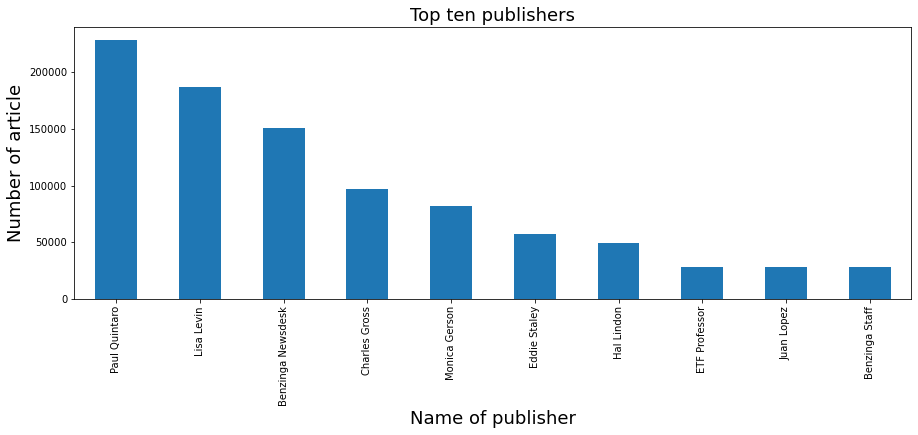

In [11]:
#top 10 active publishers are
ax = ten_top_publisher.plot(kind='bar', figsize=(15, 5))
plt.title('Top ten publishers', fontsize=18)
ax.set_ylabel('Number of article', fontsize=18)
ax.set_xlabel('Name of publisher', fontsize=18)
plt.show()

# Time series analysis

In [12]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [13]:
day_df = df.resample('D', on='date')

In [14]:
# Time series article



In [15]:
top_ten_number_of_art_per_day = df['date'].value_counts().sort_values(ascending=False).head(10)

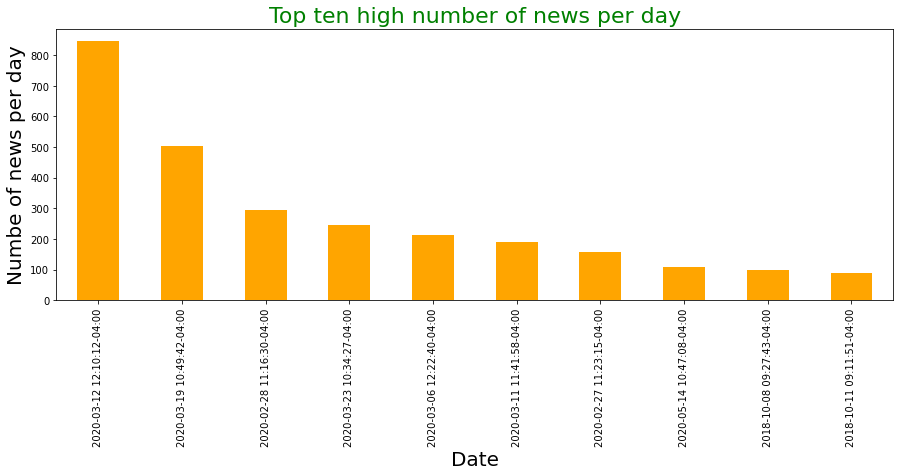

In [16]:
ax = top_ten_number_of_art_per_day.plot(kind='bar', color='orange', figsize=(15, 5))
plt.title("Top ten high number of news per day", color='green', fontsize=22)
ax.set_ylabel('Numbe of news per day', fontsize=20)
ax.set_xlabel('Date', fontsize=20)
plt.show()

# Sentiment Analysis

In [17]:
#headline
ex = df.sample()


In [18]:
sia = SentimentIntensityAnalyzer()

In [19]:
# ##sentiment analysis
# res = {}
# i = -1
# def sentiment_headline(headline):
#     """
#     Function to work with the headline sentiment
#     it uses the dict res(result): to store the result
#     the global variable i will be incremneted each time the function is executed
#     """
#     global i
#     i = i + 1
#     res[i] = sia.polarity_scores(headline)

# # df['headline'].apply(sentiment_headline)

In [20]:
res = {}

for i, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing rows"):
    headline = row['headline']
    res[i] = sia.polarity_scores(headline)


Processing rows: 100%|██████████████| 1407328/1407328 [14:25<00:00, 1626.45it/s]


In [21]:
vaders = pd.DataFrame(res).T

In [22]:
vaders = vaders.reset_index()
df = df.reset_index()
vaders = vaders.merge(df, how="left")

In [23]:
#sentiment value of each headline
vaders = vaders.drop(['index'], axis=1)
vaders

,neg,neu,pos,compound,headline,url,publisher,date,stock,headline_len,publisher_nleng
0,0.000,1.000,0.000,0.0000,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,17
1,0.000,1.000,0.000,0.0000,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,17
2,0.000,1.000,0.000,0.0000,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,10
3,0.000,1.000,0.000,0.0000,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,10
4,0.000,0.833,0.167,0.2960,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,10
...,...,...,...,...,...,...,...,...,...,...,...
1407323,0.000,0.769,0.231,0.2023,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,NaT,ZX,38,13
1407324,0.333,0.490,0.176,-0.3818,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,NaT,ZX,52,12
1407325,0.000,1.000,0.000,0.0000,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,NaT,ZX,56,14
1407326,0.000,1.000,0.000,0.0000,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,NaT,ZX,54,9


In [24]:
df.set_index('date', inplace=True)

In [25]:
news_counts = df.resample('H').size()

In [26]:
peek_times = news_counts[news_counts == news_counts.max()]

<AxesSubplot:title={'center':'Number of News Release'}, xlabel='date'>

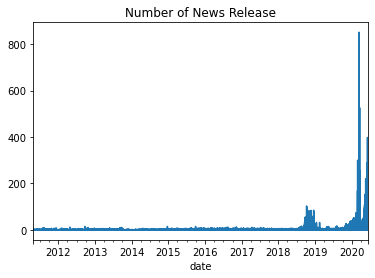

In [27]:
news_counts.plot(kind='line', title='Number of News Release')

## Vader result


In [28]:
#drop non numeric data
non_numeric_vaders = vaders.drop(['headline', 'publisher', 'url', 'stock'], axis=1)
non_numeric_vaders.head()

,neg,neu,pos,compound,date,headline_len,publisher_nleng
0,0.0,1.000,0.000,0.000,2020-06-05 10:30:54-04:00,39,17
1,0.0,1.000,0.000,0.000,2020-06-03 10:45:20-04:00,42,17
2,0.0,1.000,0.000,0.000,2020-05-26 04:30:07-04:00,29,10
3,0.0,1.000,0.000,0.000,2020-05-22 12:45:06-04:00,44,10
4,0.0,0.833,0.167,0.296,2020-05-22 11:38:59-04:00,87,10


In [29]:
#weekly analysis
non_numeric_vaders_mean = non_numeric_vaders.resample('W', on='date').mean()
non_numeric_vaders_mean.head()

,neg,neu,pos,compound,headline_len,publisher_nleng
date,,,,,,
2011-05-01 00:00:00-04:00,0.019714,0.866429,0.113857,0.169629,56.714286,12.714286
2011-05-08 00:00:00-04:00,0.010000,0.888500,0.101500,0.096960,48.950000,12.600000
2011-05-15 00:00:00-04:00,0.022667,0.854167,0.123167,0.072117,43.583333,12.416667
2011-05-22 00:00:00-04:00,0.029133,0.924200,0.046667,0.024087,51.466667,12.466667
2011-05-29 00:00:00-04:00,0.077136,0.753045,0.169955,0.141782,48.000000,11.545455


In [44]:
#monthly analysis
def plot_time_series(var, label):
    non_numeric_vaders_mean = non_numeric_vaders.resample('M', on='date').mean()
    non_numeric_vaders_mean.reset_index(inplace=True)


    plt.figure(figsize=(15, 5))
    plt.plot(np.array(non_numeric_vaders_mean['date']), np.array(non_numeric_vaders_mean[var]), marker='o')
    plt.xlabel('Month')
    plt.ylabel(label)
    plt.title(f'Monthly Time Series of {label}')
    plt.grid(True)
    plt.show()

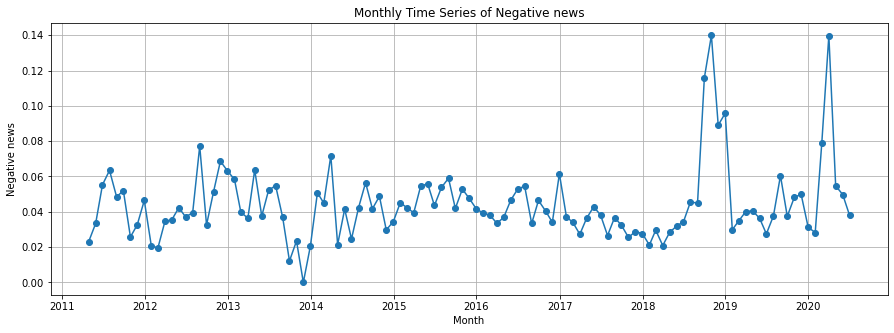

In [45]:
plot_time_series('neg', 'Negative news')


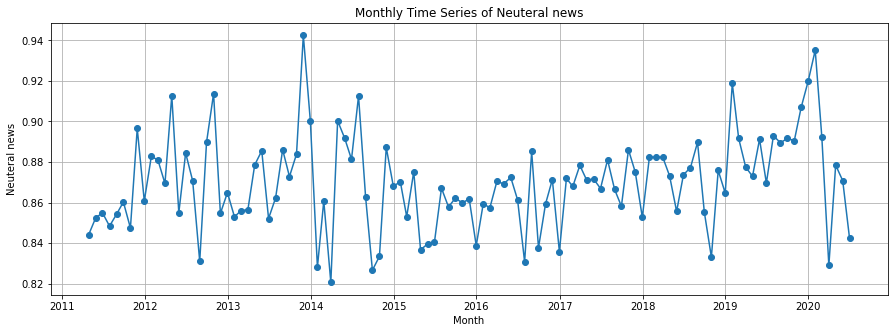

In [46]:
plot_time_series('neu', 'Neuteral news')

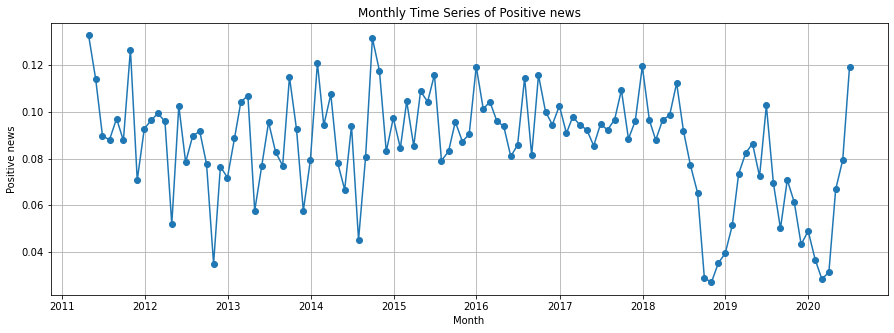

In [47]:
plot_time_series('pos', 'Positive news')

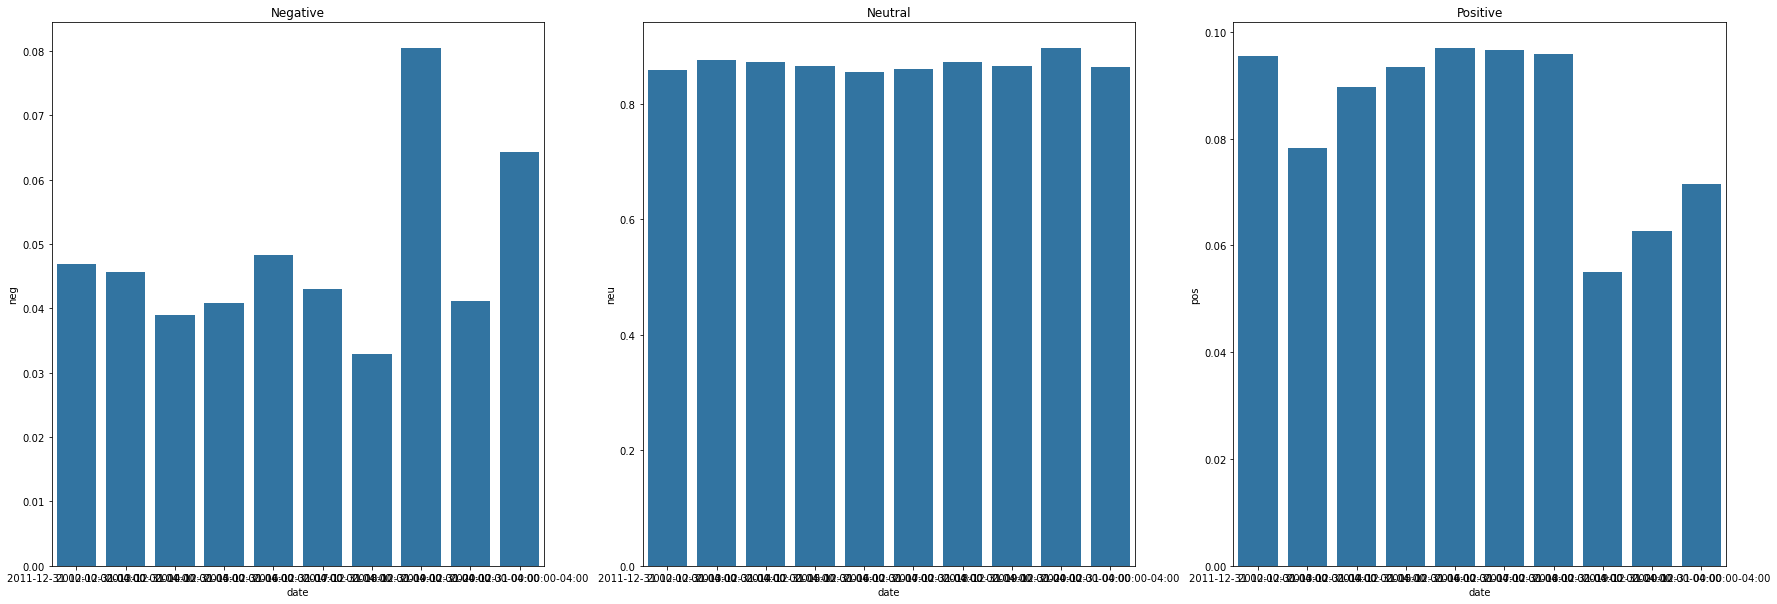

In [49]:
yearly_mean_non_numeric_vaders = non_numeric_vaders.resample('Y', on='date').mean()

fig, ax = plt.subplots(1, 3, figsize=(30, 10))
 
sns.barplot(data=yearly_mean_non_numeric_vaders, x='date', y='neg', ax=ax[0])
sns.barplot(data=yearly_mean_non_numeric_vaders, x='date', y='neu', ax=ax[1])
sns.barplot(data=yearly_mean_non_numeric_vaders, x='date', y='pos', ax=ax[2])
ax[0].set_title('Negative')
ax[1].set_title('Neutral')
ax[2].set_title('Positive')
plt.show()

In [ ]:
#headline vs compound sentiment value
# ax = sns.barplot(data=vaders, x='headline', y='compound')
# ax.set_title('Compound Sentiment by headline')
# plt.show()

# Publisher Analysis

<AxesSubplot:xlabel='publisher'>

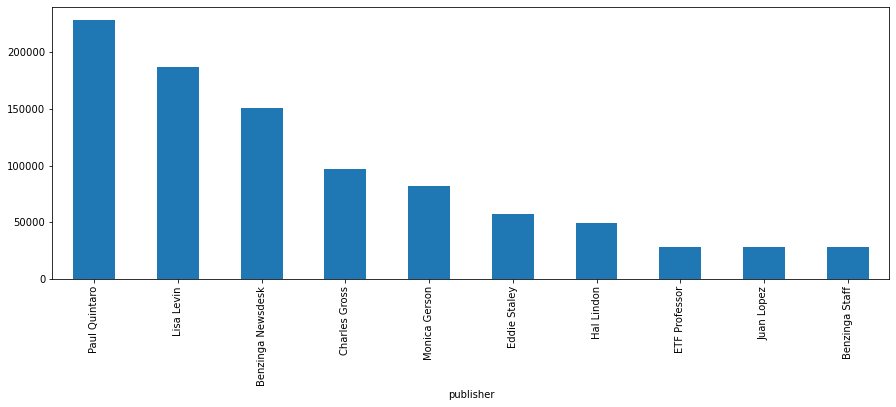

In [53]:
#top ten publisher
ten_top_publisher.plot(kind='bar', figsize=(15,5))

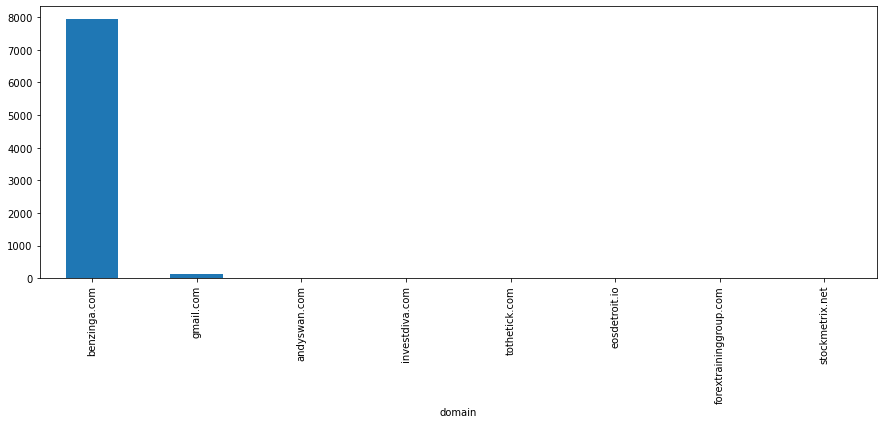

In [52]:
#import package
import re

#pattern to match a domain
pattern = r'@([A-Za-z0-9.-]+\.[A-Za-z]{2,4})'

df['domain'] = df['publisher'].str.extract(pattern)

domain_counts = df['domain'].value_counts()

#showing the bar for domain
ax = domain_counts.plot(kind='bar', figsize=(15, 5))